In [25]:
import pandas as pd
from sklearn.datasets import load_diabetes
import torch

In [50]:
X, y = load_diabetes(return_X_y=True, scaled=True)
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

In [51]:
X_train = X[:-20, :]
X_test = X[-20:, :]
y_train = y[:-20]
y_test = y[-20:]

In [52]:
in_features = X_train.shape[1]
out_features = 1
model_linear = torch.nn.Sequential(
    torch.nn.Linear(in_features, out_features, bias=True),
    torch.nn.Flatten(start_dim=0, end_dim=1),
)

loss_fn = torch.nn.MSELoss(reduction='sum')

In [58]:
lr = 1e-6
n_epochs = 2_000
losses = torch.zeros(n_epochs)

for t in range(n_epochs):
    y_pred = model_linear(X_train)
    loss = loss_fn(y_pred, y_train)
    model_linear.zero_grad()  # object method

    loss.backward()

    with torch.no_grad():
        for p in model_linear.parameters():
            p -= lr * p.grad

        losses[t] = loss.item()

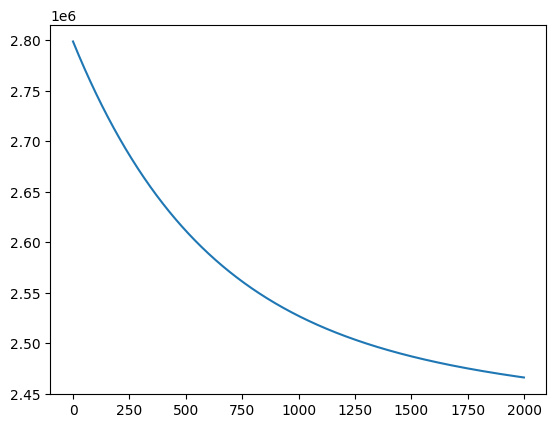

In [59]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [67]:
linear_layer = model_linear[0]
print(f'Result: y = {linear_layer.bias.item():3f} + {linear_layer.weight[:, 0].item():.3f} x + {linear_layer.weight[:, 1].item():.3f} x^2 + {linear_layer.weight[:, 2].item():.3f} x^3')

Result: y = 148.298523 + 2.314 x + 0.674 x^2 + 7.499 x^3
